<a href="https://colab.research.google.com/github/Janaalsh5/Heart-Disease/blob/main/Phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# **Project Goal:**

The primary objective of this project is to develop innovative predictive techniques that not only classify patients based on their risk of heart disease using multiple medical indicators but also employ clustering techniques to uncover distinct patient profiles. By integrating these approaches, the project aims to provide healthcare professionals with actionable insights that enhance early detection and personalized prevention strategies, ultimately contributing to improved cardiovascular health outcomes.

# **Dataset Source:**

The dataset was obtained from kaggle.com
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?resource=download

# **Dataset Description**

In [4]:
import pandas as pd
from tabulate import tabulate
df = pd.read_csv("/content/heart.csv")

***Features:***
Number and data types of attirbutes


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


***Number of Objects:***


In [ ]:
print(f"- Rows (instances): {df.shape[0]}")
print(f"- Columns (features): {df.shape[1]}")

- Rows (instances): 918
- Columns (features): 12


***Class Distribution:***
Class attribute with its values


In [ ]:
print("Target Column (class attribute): HeartDisease")
count_0 = df[df["HeartDisease"] == 0].shape[0]
count_1 = df[df["HeartDisease"] == 1].shape[0]
print(f"- Patients with NO heart disease (0): {count_0}")
print(f"- Patients WITH heart disease (1): {count_1}")


Target Column (class attribute): HeartDisease
- Patients with NO heart disease (0): 410
- Patients WITH heart disease (1): 508


***Dataset Sample***
sample of the raw dataset.

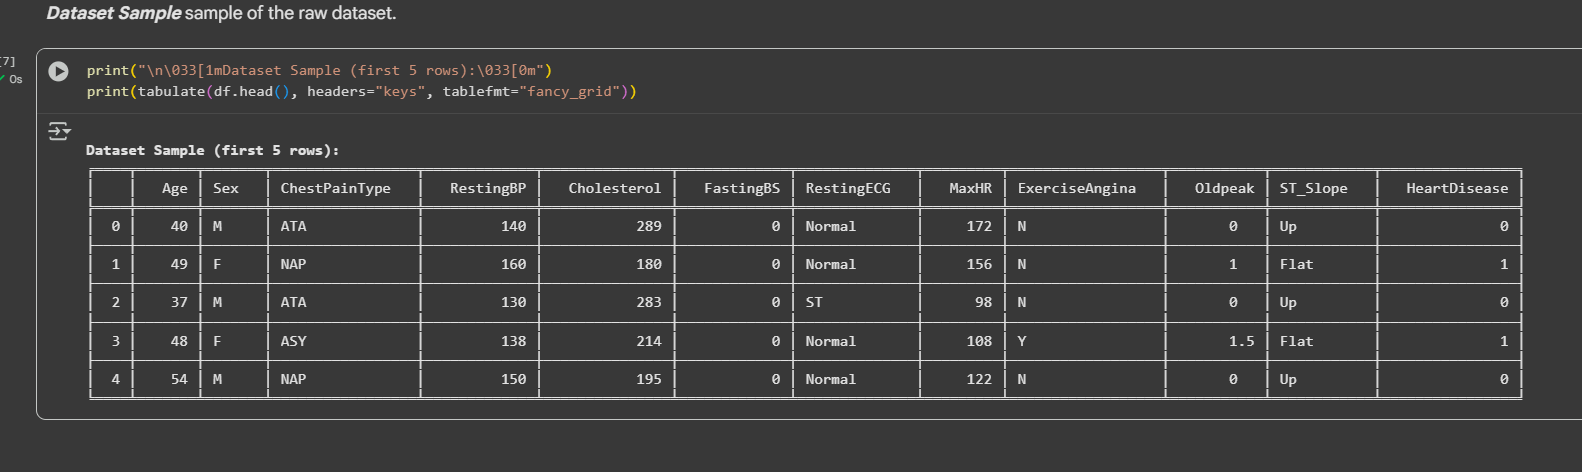

In [9]:
from IPython.display import Image, display

display(Image("/content/Screenshot 2025-09-16 191530.png"))

*We displayed the table as a photo for a better represntaiton*

In [10]:
print("\n\033[1mDataset Sample (first 5 rows):\033[0m")
print(tabulate(df.head(), headers="keys", tablefmt="fancy_grid"))


Dataset Sample (first 5 rows):
╒════╤═══════╤═══════╤═════════════════╤═════════════╤═══════════════╤═════════════╤══════════════╤═════════╤══════════════════╤═══════════╤════════════╤════════════════╕
│    │   Age │ Sex   │ ChestPainType   │   RestingBP │   Cholesterol │   FastingBS │ RestingECG   │   MaxHR │ ExerciseAngina   │   Oldpeak │ ST_Slope   │   HeartDisease │
╞════╪═══════╪═══════╪═════════════════╪═════════════╪═══════════════╪═════════════╪══════════════╪═════════╪══════════════════╪═══════════╪════════════╪════════════════╡
│  0 │    40 │ M     │ ATA             │         140 │           289 │           0 │ Normal       │     172 │ N                │       0   │ Up         │              0 │
├────┼───────┼───────┼─────────────────┼─────────────┼───────────────┼─────────────┼──────────────┼─────────┼──────────────────┼───────────┼────────────┼────────────────┤
│  1 │    49 │ F     │ NAP             │         160 │           180 │           0 │ Normal       │     156 │ N  